<a href="https://colab.research.google.com/github/tnthdrhks1/knu_machine_learning/blob/main/1206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import plot_tree, DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌. 
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


# 결정트리 
- 

In [ ]:
x = [120,130,140,170,180]
y = [0,0,0,1,1] #이진분류 / 사람몸,자동차 번호판,얼굴,마케팅 성공,실패

In [ ]:
x = np.array(x).reshape(-1,1)

In [ ]:
model = DecisionTreeClassifier().fit(x,y) #결정트리
model.score(x,y) #gini 계수 = 불순도

1.0

[Text(167.4, 163.07999999999998, 'X[0] <= 155.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

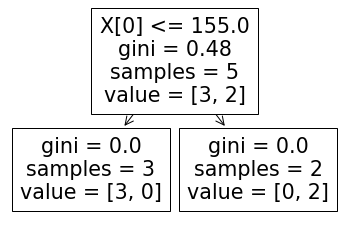

In [ ]:
plot_tree(model)

In [ ]:
x = [[170,260],[180,260],[160,250],[150,230],[173,255]]
y = [0,0,1,1,1]
y = ['M','M','M','W','W']

In [ ]:
model = DecisionTreeClassifier().fit(x,y)
model.score(x,y)

1.0

[Text(200.88000000000002, 190.26, 'X[1] <= 257.5\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(133.92000000000002, 135.9, 'X[0] <= 155.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(66.96000000000001, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 81.53999999999999, 'X[1] <= 252.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(133.92000000000002, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(267.84000000000003, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(267.84000000000003, 135.9, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

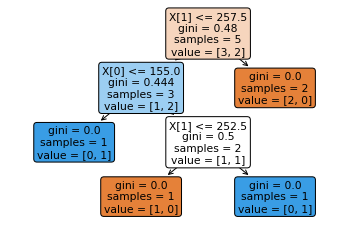

In [ ]:
plot_tree(model, filled=True, rounded=True,rotate=False)

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
df = pd.read_csv(url, header = None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
df.columns = ' sepal length' ,'dsepal' ,'width petal' ,'length petal' ,'width class'
df

,sepal length,dsepal,width petal,length petal,width class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
x=df.drop('width class',axis=1)
y=df['width class']

In [ ]:
#NODE = 네모박스
#EDGE = 화살표

model = DecisionTreeClassifier(max_depth=3).fit(x,y) # 나무높이 제한, 뿌리에서 세번까지 허용
model.score(x,y)

0.9733333333333334

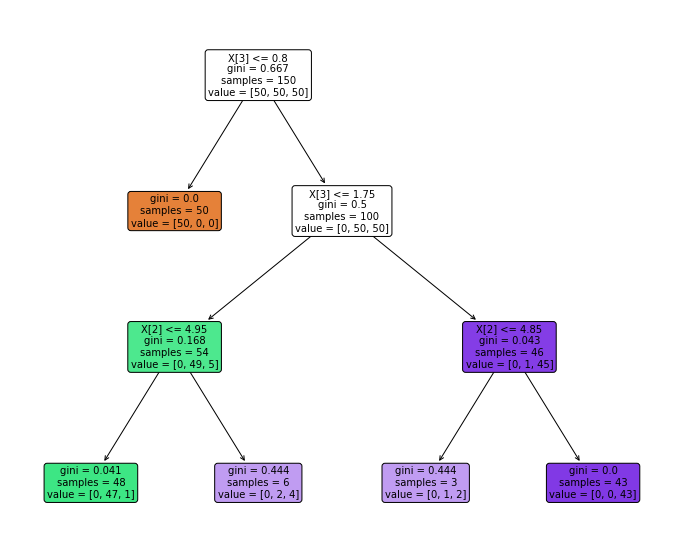

In [ ]:
plt.figure(figsize=(12,10))
result = plot_tree(model,filled=True,rounded=True,rotate=False,fontsize=10)

In [ ]:
# 나무는 정확도 1.0이 될때 까지 가지를 만듬, 그러면 나무가 못자람 (오버피팅) / 가지치기를 해줘야함
model = DecisionTreeClassifier(max_depth=3).fit(x,y)
model.score(x,y)

0.9733333333333334

# 연소득 5000만 이상의 가정을 찾아라
- uci adult dataset

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
df = pd.read_csv(url,header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','target']
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df_hot = pd.get_dummies(df)
df_hot

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,target_ <=50K,target_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32557,40,154374,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
32558,58,151910,9,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
32559,22,201490,9,0,0,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
y = df_hot['target_ >50K']
x = df_hot.drop(['target_ >50K','target_ <=50K'],axis=1)
x.shape,y.shape

((32561, 108), (32561,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21815, 108), (10746, 108), (21815,), (10746,))

In [ ]:
model = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train,y_train)
model.score(X_train, y_train)

0.8487279394911758

In [ ]:
model_ = SGDClassifier().fit(X_train, y_train)
model_.score(X_train, y_train)

0.7910153564061425

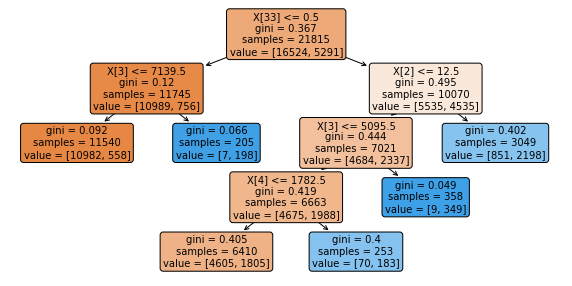

In [ ]:
plt.figure(figsize=(10,5))
result = plot_tree(model,filled=True,rounded=True,rotate=False,fontsize=10)

# bank uci bank dataset


In [ ]:
df = pd.read_csv('bank.csv',sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
# target = y_yes
df_hot = pd.get_dummies(df)
df_hot

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y_no,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0
1,33,4789,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,35,1350,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,30,1476,3,199,4,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
4,59,0,5,226,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
4517,57,-3313,9,153,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
4518,57,295,19,151,11,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4519,28,1137,6,129,4,211,3,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [ ]:
y = df_hot['y_yes']
X = df_hot.drop(['y_yes','y_no'],axis=1)
X.shape,y.shape

((4521, 51), (4521,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3029, 51), (1492, 51), (3029,), (1492,))

In [ ]:
model = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=7).fit(X_train,y_train)
model.score(X_train,y_train)

0.8993067018818092

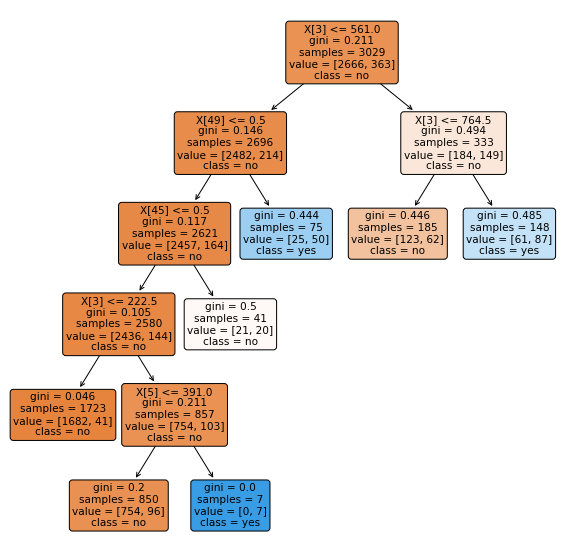

In [ ]:
plt.figure(figsize=(10,10))
result = plot_tree(model,filled=True,class_names=['no','yes'],rounded=True)

# 타이나닉 생존예측


In [ ]:
df = pd.read_csv('train.csv')
df# = df.drop.('Cabin',axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df = df.fillna(0)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df['Cabin'].unique()

array([0, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6', 'C23 C25 C27',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       '

In [ ]:
df = df.set_index('PassengerId')
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S


In [ ]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,0.010539,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.361353,0.083081,0.018443,-0.549500
Age,0.010539,-0.361353,1.000000,-0.184664,-0.048786,0.135516
SibSp,-0.035322,0.083081,-0.184664,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.048786,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.135516,0.159651,0.216225,1.000000


In [ ]:
df.isna().sum()
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     891 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df['Embarked'].nunique()

4

In [ ]:
LenName = []
for i in range (len(df['Name'])):
  LenName.append(len(df['Name'][i+1]))


In [ ]:
#name, Ticket drop
df['LenName'] = LenName
df_hot=pd.get_dummies(df.drop(['Name','Ticket'],axis=1))
df_hot

,Survived,Pclass,Age,SibSp,Parch,Fare,LenName,Sex_female,Sex_male,Cabin_0,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,Cabin_A20,Cabin_A23,Cabin_A24,Cabin_A26,Cabin_A31,Cabin_A32,Cabin_A34,Cabin_A36,Cabin_A5,Cabin_A6,Cabin_A7,Cabin_B101,Cabin_B102,Cabin_B18,Cabin_B19,Cabin_B20,Cabin_B22,Cabin_B28,Cabin_B3,Cabin_B30,Cabin_B35,Cabin_B37,Cabin_B38,Cabin_B39,Cabin_B4,Cabin_B41,...,Cabin_D56,Cabin_D6,Cabin_D7,Cabin_D9,Cabin_E10,Cabin_E101,Cabin_E12,Cabin_E121,Cabin_E17,Cabin_E24,Cabin_E25,Cabin_E31,Cabin_E33,Cabin_E34,Cabin_E36,Cabin_E38,Cabin_E40,Cabin_E44,Cabin_E46,Cabin_E49,Cabin_E50,Cabin_E58,Cabin_E63,Cabin_E67,Cabin_E68,Cabin_E77,Cabin_E8,Cabin_F E69,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_0,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,23,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,1,38.0,1,0,71.2833,51,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,3,26.0,0,0,7.9250,22,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,1,35.0,1,0,53.1000,44,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,3,35.0,0,0,8.0500,24,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000,21,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,1,1,19.0,0,0,30.0000,28,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
889,0,3,0.0,1,2,23.4500,40,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df_hot.drop('Survived',axis=1)
y = df['Survived']
X.shape, y.shape

((891, 160), (891,))

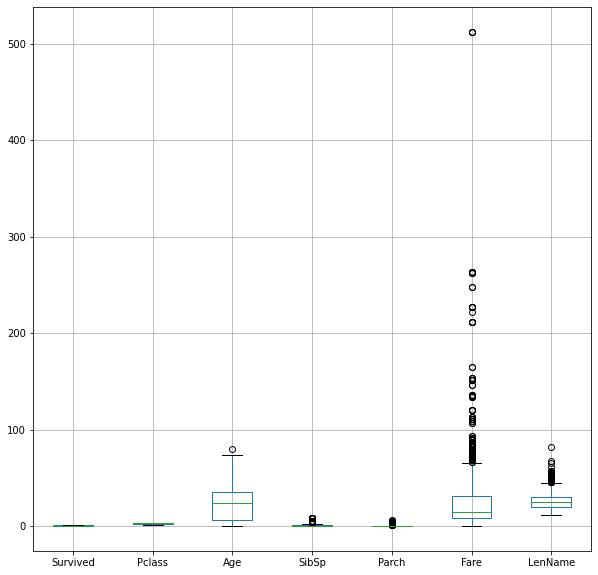

In [ ]:
df.boxplot(figsize=(10,10))

In [ ]:
X=(X-X.min())/(X.max()-X.min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((596, 160), (295, 160), (596,), (295,))

In [ ]:
X_train.isna().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
             ..
Cabin_T       0
Embarked_0    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Length: 160, dtype: int64

In [ ]:
model = DecisionTreeClassifier(max_depth=5,max_leaf_nodes=8).fit(X_train,y_train)
model.score(X_train, y_train)

0.8288590604026845

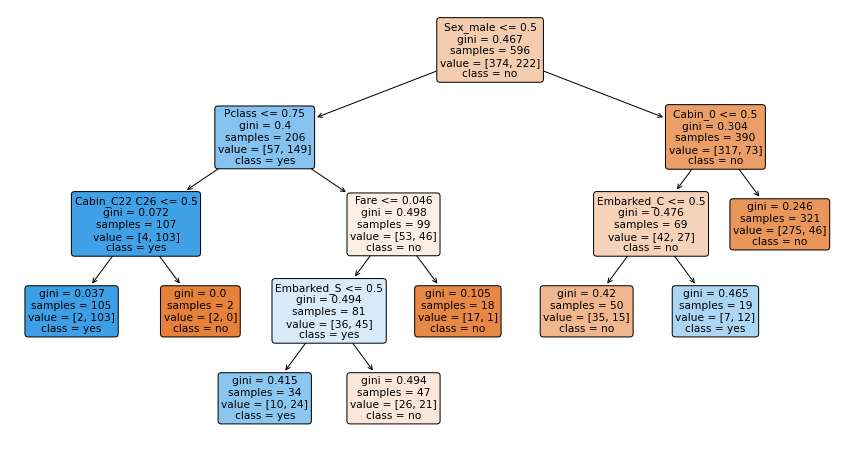

In [ ]:
plt.figure(figsize=(15,8))
result=plot_tree(model,filled=True, feature_names=X.columns, rounded=True,class_names=['no','yes'],rotate=False)

In [ ]:
100 - (np.abs(model.predict(X) - y).sum() / len(y)) * 100

81.3692480359147

# 진짜 데이터로 분석
- test, train으로 분석

In [ ]:
test_file = pd.read_csv('test.csv')#.drop('Cabin',axis=1)
test_file

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_file = test_file.fillna(0)
test_file.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
test = test_file.drop(['Name'],axis=1)
test.shape

(418, 10)

In [ ]:
test_hot = pd.get_dummies(test)
test_hot.shape

(418, 451)

In [ ]:
df_h = pd.get_dummies(df.drop('Name',axis=1))
df_h.shape

(891, 842)

# 와인데이터
- uci

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
df = pd.read_csv(url, header=None).drop(0,axis=1)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
df.isna().sum()

1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [ ]:
Y = df[1]
X = df.drop(columns=1)
X.shape, y.shape

((178, 12), (891,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
model = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=7).fit(X, Y)#모델 조절 과정
model.score(X, Y)

ValueError: ignored

# wine quality dataset
- 오차행렬 출력

In [ ]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
df = pd.read_csv(url,sep=';')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
df.isna().sum()

In [ ]:
df.info()

In [ ]:
df.corr()['quality']

In [ ]:
df.boxplot(figsize=(18,3))

In [ ]:
y.unique()

In [ ]:
X = df.drop('quality',axis=1)
y = df['quality']
X.shape, y.shape

In [ ]:
X = (X-X.min())/(X.max()-X.min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
model = SGDClassifier().fit(X_train,y_train)
model.score(X_train,y_train)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y,model.predict(X))

In [ ]:
print(classification_report(y,model.predict(X)))

In [ ]:
y.hist()

# 손글씨


In [ ]:
from sklearn.datasets import load_digits

In [ ]:
X, Y = load_digits(return_X_y=True)

In [ ]:
X.shape,Y.shape

In [ ]:
Y.shape, X.shape

In [ ]:
model = SGDClassifier().fit(X,Y)

In [ ]:
model.score(X,Y)

In [ ]:
h=model.predict(X)
confusion_matrix(Y,h)

In [ ]:
print(classification_report(Y,h))

In [ ]:
cond = np.logical_and(Y==1, h==5)
X_false = X[cond]
X_false.shape, X_false.ndim

In [ ]:
x_img = np.reshape(X_false, (-1,8,8))
x_img.shape, x_img.ndim

In [ ]:
x_img = np.transpose(x_img, (1,0,2))
x_img.shape, x_img.ndim

In [ ]:
x_img = np.reshape(x_img, (8,-1))
x_img.shape, x_img.ndim

In [ ]:
plt.figure(figsize = (10,5))
plt.imshow(x_img)

# 고양이, 개 사진 분류

In [ ]:
from PIL import Image

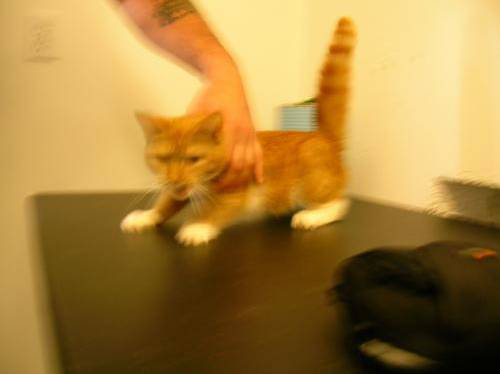

In [ ]:
img_c0 = Image.open('/content/cat/cat.0.jpg')
img_c0

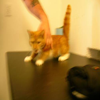

In [ ]:
img_c0 = img_c0.resize((100,100))
img_c0

In [ ]:
np.array(img_c0).shape

(100, 100, 3)

In [ ]:
img = np.reshape(np.array(img_c0), (-1))
img.shape

(30000,)

In [ ]:
catlist = []
catname = []
for i in range(10):
  img_c0 = Image.open('/content/cat/cat.{0}.jpg'.format(i))
  img_c0 = img_c0.resize((100,100))
  catname.append('cat')
  np.array(img_c0).shape
  catimg = np.reshape(np.array(img_c0), (-1))
  catlist.append(catimg)
print(catlist)

[array([205, 166,  89, ...,   2,   2,   0], dtype=uint8), array([40, 45, 42, ..., 45, 33, 25], dtype=uint8), array([ 69,  52,  58, ..., 147, 135, 136], dtype=uint8), array([152, 143, 133, ..., 187, 185, 165], dtype=uint8), array([145, 134, 127, ...,   4,  17,  15], dtype=uint8), array([  2,   1,   6, ..., 171, 235, 220], dtype=uint8), array([217, 191, 202, ..., 107,  29,  55], dtype=uint8), array([30, 12,  2, ..., 24, 35, 31], dtype=uint8), array([41, 25, 28, ..., 89, 85, 82], dtype=uint8), array([145, 100,  95, ..., 150, 104,  91], dtype=uint8)]


In [ ]:
doglist = []
dogname = []
for i in range(10):
  img_c0 = Image.open('/content/dog/dog.{0}.jpg'.format(i))
  img_c0 = img_c0.resize((100,100))
  dogname.append('dog')
  np.array(img_c0).shape
  dogimg = np.reshape(np.array(img_c0), (-1))
  doglist.append(dogimg)
print(doglist)

[array([115, 113, 125, ...,  72,  81,  84], dtype=uint8), array([176, 151, 128, ..., 239, 241, 223], dtype=uint8), array([190, 163, 131, ..., 211, 206, 200], dtype=uint8), array([220, 231, 225, ..., 156, 167, 169], dtype=uint8), array([155, 147, 136, ...,  37,  36,  37], dtype=uint8), array([162, 173, 157, ..., 105, 110,  68], dtype=uint8), array([158, 151, 133, ..., 147, 140, 121], dtype=uint8), array([ 17,  19,  16, ..., 126, 129, 134], dtype=uint8), array([ 87, 109,  72, ..., 251, 245, 245], dtype=uint8), array([214, 222, 222, ...,  89, 116,  68], dtype=uint8)]


In [ ]:
npcat = np.stack(catlist,axis=1)
npcat.shape

(30000, 10)

In [ ]:
npcatname = np.stack(catname).reshape(-1,1)
npdogname = np.stack(dogname).reshape(-1,1)
Y = np.concatenate([npcatname,npdogname],axis=0)
Y.shape

(20, 1)

In [ ]:
npcat = np.stack(catlist).reshape(10,-1)
npdog = np.stack(doglist).reshape(10,-1)
npcat.shape, npdog.shape

((10, 30000), (10, 30000))

In [ ]:
X = np.concatenate([npcat,npdog],axis=0)
X.shape, Y

((20, 30000), array([['cat'],
        ['cat'],
        ['cat'],
        ['cat'],
        ['cat'],
        ['cat'],
        ['cat'],
        ['cat'],
        ['cat'],
        ['cat'],
        ['dog'],
        ['dog'],
        ['dog'],
        ['dog'],
        ['dog'],
        ['dog'],
        ['dog'],
        ['dog'],
        ['dog'],
        ['dog']], dtype='<U3'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13, 30000), (7, 30000), (13, 1), (7, 1))

In [ ]:
model = SGDClassifier().fit(X_train,y_train)
model.score(X,Y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.85

In [ ]:
model.coef_

array([[4065.54472985, 5403.01151461, 4712.13463242, ..., 1842.33835252,
        4402.12577502, 3507.52878654]])

In [ ]:
X[:10].shape

(10, 30000)

In [ ]:
confusion_matrix(Y,model.predict(X))

array([[8, 2],
       [1, 9]])

In [ ]:
print(classification_report(Y,model.predict(X)))

              precision    recall  f1-score   support

         cat       0.89      0.80      0.84        10
         dog       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



In [ ]:
X_ = np.reshape(X,(-1,100,100,3))
X_.shape

(20, 100, 100, 3)

In [ ]:
X_ = np.transpose(X_, (1,0,2,3))
X_.shape

(100, 20, 100, 3)

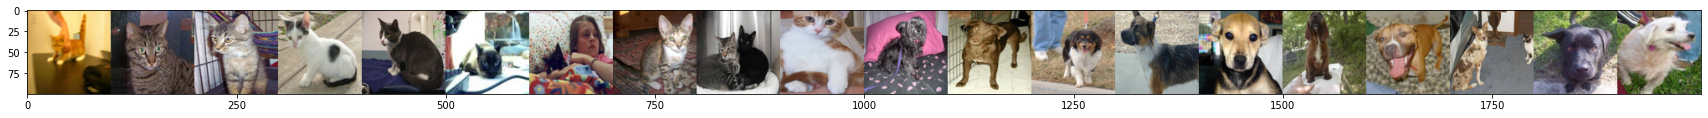

In [ ]:
X_ = X_.reshape(100,20*100,3)
plt.figure(figsize=(30,50))
plt.imshow(X_)

# 마스크 쓴사람 안쓴사람 분류


In [ ]:
img = Image.open('/content/face/00000_Mask.jpg')

In [ ]:
img = img.resize((50,50))

In [ ]:
img = np.array(img)
img.shape

(50, 50, 3)

In [ ]:
img.reshape(-1).shape

(7500,)

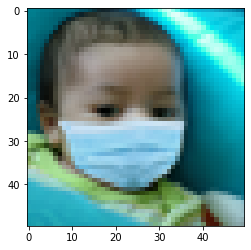

In [ ]:
plt.imshow(img)

In [ ]:
from glob import glob

In [ ]:
MSKlist = glob('/content/face/*.jpg')
MSKlist

['/content/face/00005_Mask_Mouth_Chin.jpg',
 '/content/face/00002_Mask.jpg',
 '/content/face/00001_Mask.jpg',
 '/content/face/00007_Mask_Mouth_Chin.jpg',
 '/content/face/00003_Mask.jpg',
 '/content/face/00001_Mask_Chin.jpg',
 '/content/face/00000_Mask_Mouth_Chin.jpg',
 '/content/face/00005_Mask.jpg',
 '/content/face/00008_Mask.jpg',
 '/content/face/00006_Mask.jpg',
 '/content/face/00008_Mask_Mouth_Chin.jpg',
 '/content/face/00002_Mask_Mouth_Chin.jpg',
 '/content/face/00004_Mask.jpg',
 '/content/face/00009_Mask.jpg',
 '/content/face/00003_Mask_Mouth_Chin.jpg',
 '/content/face/00007_Mask.jpg',
 '/content/face/00001_Mask_Mouth_Chin.jpg',
 '/content/face/00010_Mask_Mouth_Chin.jpg',
 '/content/face/00000_Mask.jpg',
 '/content/face/00004_Mask_Mouth_Chin.jpg']

In [ ]:
listx = []
listy = []
for i in range (len(MSKlist)):
  y=1
  img_msk = Image.open(MSKlist[i])
  img_msk = img_msk.resize((50,50))
  img = np.array(img_msk)
  img = img.reshape(-1)
  print(img.shape)
  listx.append(img.reshape(-1))
#  print(MSKlist[i][20:-4])
  if MSKlist[i][20:-4] == 'Mask': 
    y=0
  elif MSKlist[i][20:-4] == 'Mask_Mouth_Chin':
    y=1
  else:
    y=2
  listy.append(y)
  

(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)
(7500,)


In [ ]:
y = np.array(listy)
y

array([1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1])

In [ ]:
X = np.stack(listx)
X.shape

(20, 7500)

In [ ]:
model = SGDClassifier().fit(X,y)
model.score(X,y)

1.0

In [ ]:
h = model.predict(X)
confusion_matrix(y,h)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0,  1]])

In [ ]:
print(classification_report(y,h))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         1

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
X.shape

(20, 7500)

In [ ]:
#sklearn NN 뉴럴네트워크 CNN, RNN은 없음
from sklearn.neural_network import MLPClassifier

In [ ]:
X = X/np.max(X)

In [ ]:
model = MLPClassifier((5,5), max_iter=1500).fit(X,y) #뉴런 4개짜리 히든레이어 하나 추가
model.score(X,y)

0.45

In [ ]:
X = X.reshape(20,50,50,3)
X.shape

(20, 50, 50, 3)

In [ ]:
X = X.transpose(1,0,2,3)
X.shape

(50, 20, 50, 3)

In [ ]:
X = X.reshape(50, 20*50, 3)
X.shape

(50, 1000, 3)

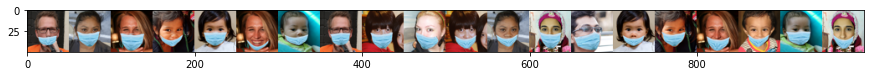

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(X)